<a href="https://colab.research.google.com/github/ajits-github/UserActionPrediction_And_Clustering/blob/main/UserActionPrediction_And_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read the data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
df_original = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UserLane/portal_data_extract_2023_06_07.csv")
df_original


,userId,eventTime,action,url,sessionId
0,2.736930e+18,28-04-2023 12:37,showAppWindow,https://portal.acme.com/app/{app_id}/announcem...,1.678580e+19
1,2.736930e+18,28-04-2023 12:37,hideAppWindow,https://portal.acme.com/app/{app_id}/announcem...,1.678580e+19
2,2.736930e+18,28-04-2023 12:38,showAppWindow,https://portal.acme.com/app/{app_id}/announcem...,1.678580e+19
3,2.736930e+18,28-04-2023 12:38,hideAppWindow,https://portal.acme.com/app/{app_id}/announcem...,1.678580e+19
4,4.271280e+18,28-04-2023 12:38,click,https://portal.acme.com/app/{app_id}/manage/97...,8.230570e+18
...,...,...,...,...,...
379215,6.614460e+18,28-04-2023 12:37,click,https://portal.acme.com/app/{app_id}/announcem...,1.302380e+19
379216,6.614460e+18,28-04-2023 12:37,click,https://portal.acme.com/app/{app_id}/announcem...,1.302380e+19
379217,6.614460e+18,28-04-2023 12:37,hideAppWindow,https://portal.acme.com/app/{app_id}/analytics...,1.302380e+19
379218,4.271280e+18,28-04-2023 12:37,showAppWindow,https://portal.acme.com/app/{app_id}/manage/97...,8.230570e+18


In [ ]:
# Take a copy of original dataframe to do other operations
df = df_original.copy()
# df.head()


# Data Pre-processing And Extraction
Based on the provided data, here are some potential cleaning steps that can be considered:

In [ ]:
# Check for missing values
df.isnull().sum()


userId       0
eventTime    0
action       0
url          0
sessionId    0
dtype: int64

In [ ]:
# Drop rows with missing values
# df_cleaned = df.dropna(inplace=True)
print("Shape of the dataframe BEFORE dropping the missing values: ",df.shape)
df.dropna(inplace=True)
print("Shape of the dataframe AFTER dropping the missing values: ",df.shape)
df.head()


Shape of the dataframe BEFORE dropping the missing values:  (379220, 5)
Shape of the dataframe AFTER dropping the missing values:  (379220, 5)


,userId,eventTime,action,url,sessionId
0,2.736930e+18,28-04-2023 12:37,showAppWindow,https://portal.acme.com/app/{app_id}/announcem...,1.678580e+19
1,2.736930e+18,28-04-2023 12:37,hideAppWindow,https://portal.acme.com/app/{app_id}/announcem...,1.678580e+19
2,2.736930e+18,28-04-2023 12:38,showAppWindow,https://portal.acme.com/app/{app_id}/announcem...,1.678580e+19
3,2.736930e+18,28-04-2023 12:38,hideAppWindow,https://portal.acme.com/app/{app_id}/announcem...,1.678580e+19
4,4.271280e+18,28-04-2023 12:38,click,https://portal.acme.com/app/{app_id}/manage/97...,8.230570e+18


In [ ]:
# Check for duplicate entries
duplicates = df.duplicated().sum()
print("Number of duplicate entries: ",duplicates)


Number of duplicate entries:  155304


In [ ]:
# If there are any duplicate rows
print("Shape of the dataframe BEFORE dropping the duplicates: ",df.shape)
df = df.drop_duplicates()
print("Shape of the dataframe AFTER dropping the duplicates: ",df.shape)
df.head()


Shape of the dataframe BEFORE dropping the duplicates:  (379220, 5)
Shape of the dataframe AFTER dropping the duplicates:  (223916, 5)


,userId,eventTime,action,url,sessionId
0,2.736930e+18,28-04-2023 12:37,showAppWindow,https://portal.acme.com/app/{app_id}/announcem...,1.678580e+19
1,2.736930e+18,28-04-2023 12:37,hideAppWindow,https://portal.acme.com/app/{app_id}/announcem...,1.678580e+19
2,2.736930e+18,28-04-2023 12:38,showAppWindow,https://portal.acme.com/app/{app_id}/announcem...,1.678580e+19
3,2.736930e+18,28-04-2023 12:38,hideAppWindow,https://portal.acme.com/app/{app_id}/announcem...,1.678580e+19
4,4.271280e+18,28-04-2023 12:38,click,https://portal.acme.com/app/{app_id}/manage/97...,8.230570e+18


In [ ]:
# Value counts for each column
column_counts = {}
for column in df.columns:
    column_counts[column] = df[column].value_counts()

# Print the counts for each column
for column, counts in column_counts.items():
    print(f"Counts for column '{column}':\n{counts}\n")


Counts for column 'userId':
1.555200e+19    8238
1.474840e+19    6265
7.754910e+18    6126
1.634610e+19    5006
5.796830e+18    3409
                ... 
1.184340e+19       2
1.242620e+18       2
8.040170e+18       1
1.674150e+19       1
3.397150e+18       1
Name: userId, Length: 545, dtype: int64

Counts for column 'eventTime':
25-04-2023 12:12    97
26-04-2023 08:31    95
21-04-2023 08:21    93
19-04-2023 14:34    91
26-04-2023 08:32    88
                    ..
11-04-2023 19:21     1
24-04-2023 06:16     1
24-04-2023 06:02     1
24-04-2023 03:32     1
17-04-2023 06:28     1
Name: eventTime, Length: 16238, dtype: int64

Counts for column 'action':
click            75210
changeUrl        60711
hideAppWindow    41078
showAppWindow    37285
navigate          6473
reload            2409
back_forward       750
Name: action, dtype: int64

Counts for column 'url':
https://portal.acme.com/app/{app_id}/analytics/heart/overview                 22565
https://portal.acme.com/app/{app_id}/manage/

In [ ]:
# Checking the action column as it has the least categorical values and could be a potential 'TARGET/LABEL' column for the predictive modeling
df['action'].unique(), df['action'].nunique()

# df['userId'].nunique()
# df['url'].nunique()

(array(['showAppWindow', 'hideAppWindow', 'click', 'changeUrl', 'navigate',
        'back_forward', 'reload'], dtype=object),
 7)

In [ ]:
# Column counts
column_lengths = df.nunique()

# Print the length of unique values for each column
for column, length in column_lengths.items():
    print(f"Length of unique values in column '{column}': {length}")

print(f"\nTotal number of records: {df.shape[0]}")


Length of unique values in column 'userId': 545
Length of unique values in column 'eventTime': 16238
Length of unique values in column 'action': 7
Length of unique values in column 'url': 13395
Length of unique values in column 'sessionId': 7900

Total number of records: 223916


In [ ]:
# Summary statistics of numerical columns
print("Summary statistics:")
print(df.describe())


Summary statistics:
             userId     sessionId
count  2.239160e+05  2.239160e+05
mean   9.469322e+18  9.255000e+18
std    5.117701e+18  5.434183e+18
min    1.196160e+16  4.975290e+15
25%    5.380450e+18  4.490840e+18
50%    9.088200e+18  9.037350e+18
75%    1.406740e+19  1.420630e+19
max    1.841550e+19  1.844530e+19


The code below shows that every column is having a entry and the respective data types is either float type or object type.

In [ ]:
# Information about the DataFrame
print("Data information:")
df.info()


Data information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 223916 entries, 0 to 379219
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     223916 non-null  float64
 1   eventTime  223916 non-null  object 
 2   action     223916 non-null  object 
 3   url        223916 non-null  object 
 4   sessionId  223916 non-null  float64
dtypes: float64(2), object(3)
memory usage: 10.3+ MB


In [ ]:
# Confirming once more for missing values
print("Missing values:")
print(df.isnull().sum())


Missing values:
userId       0
eventTime    0
action       0
url          0
sessionId    0
dtype: int64


# Analyzing the data and extraction of relevant information

The code below calculates the duration of each session by taking the difference between consecutive event times within each session. It then provides summary statistics (e.g., mean, min, max) for session durations.

In [ ]:
# Analyzing the session durations
df['eventTime'] = pd.to_datetime(df['eventTime'])
df = df.sort_values(by=['sessionId', 'eventTime'])

df['sessionDuration'] = df.groupby('sessionId')['eventTime'].diff().dt.total_seconds()
session_duration_stats = df.groupby('sessionId')['sessionDuration'].last().describe()

print("Session duration statistics:")
session_duration_stats


Session duration statistics:


count    7.474000e+03
mean     4.724755e+03
std      2.603859e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.105790e+07
Name: sessionDuration, dtype: float64

In [ ]:
df.head(-1)


,userId,eventTime,action,url,sessionId,sessionDuration
43381,1.449040e+19,2023-05-04 11:40:00,click,https://portal.acme.com/app/{app_id}/analytics...,4.975290e+15,NaN
43384,1.449040e+19,2023-05-04 11:40:00,click,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,0.0
58470,1.449040e+19,2023-05-04 11:40:00,showAppWindow,https://portal.acme.com/app/{app_id}/analytics...,4.975290e+15,0.0
58478,1.449040e+19,2023-05-04 11:40:00,changeUrl,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,0.0
43428,1.449040e+19,2023-05-04 11:41:00,click,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,60.0
...,...,...,...,...,...,...
54092,1.119460e+19,2023-04-04 14:24:00,showAppWindow,https://portal.acme.com/app/{app_id}/manage/96...,1.844440e+19,180.0
351188,4.583000e+18,2023-04-26 07:45:00,navigate,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19,NaN
351208,4.583000e+18,2023-04-26 07:45:00,click,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19,0.0
351209,4.583000e+18,2023-04-26 07:45:00,changeUrl,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19,0.0


In [ ]:
df.isnull().sum()


userId                0
eventTime             0
action                0
url                   0
sessionId             0
sessionDuration    7900
dtype: int64



*   The above results display the number of 'NaNs' conatined i the dataframe, which is not in comparison to the total number of records.



In [ ]:
# Let's analyze the zeros in the column 'sessionDuration'
df[df['sessionDuration']==0.0]


,userId,eventTime,action,url,sessionId,sessionDuration
43384,1.449040e+19,2023-05-04 11:40:00,click,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,0.0
58470,1.449040e+19,2023-05-04 11:40:00,showAppWindow,https://portal.acme.com/app/{app_id}/analytics...,4.975290e+15,0.0
58478,1.449040e+19,2023-05-04 11:40:00,changeUrl,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,0.0
43431,1.449040e+19,2023-05-04 11:41:00,changeUrl,https://portal.acme.com/app/{app_id}/announcem...,4.975290e+15,0.0
43445,1.449040e+19,2023-05-04 11:42:00,changeUrl,https://portal.acme.com/app/{app_id}/analytics...,4.975290e+15,0.0
...,...,...,...,...,...,...
54017,1.119460e+19,2023-04-04 14:11:00,click,https://portal.acme.com/app/{app_id}/manage/96...,1.844440e+19,0.0
54065,1.119460e+19,2023-04-04 14:21:00,hideAppWindow,https://portal.acme.com/app/{app_id}/analytics...,1.844440e+19,0.0
351208,4.583000e+18,2023-04-26 07:45:00,click,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19,0.0
351209,4.583000e+18,2023-04-26 07:45:00,changeUrl,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19,0.0


* As, it can be seen from the above dataframe that the number of rows containg zeros is huge (164779 out of total 223915) and **hence this column ('sessionDuration') is not going to be crucial for further operations** and hence we will drop it later.



---



The code below counts the number of events per user-session combination, giving insights into how many events each user performed within each session.

In [ ]:
# User behavior within sessions
user_session_counts = df.groupby(['userId', 'sessionId']).size().reset_index(name='eventCount')
print("User session counts:")
# user_session_counts.head()
user_session_counts


User session counts:


,userId,sessionId,eventCount
0,1.196160e+16,1.283980e+19,13
1,1.281330e+16,7.619130e+17,19
2,1.281330e+16,1.494920e+18,6
3,1.281330e+16,2.608660e+18,43
4,1.281330e+16,3.403320e+18,29
...,...,...,...
7978,1.841550e+19,1.153920e+19,4
7979,1.841550e+19,1.210790e+19,9
7980,1.841550e+19,1.302840e+19,1
7981,1.841550e+19,1.436660e+19,2




---



# Data Visualizations

The code below plots a bar chart to visualize the distribution of different actions in the dataset, allowing us to identify the most common and least common actions.

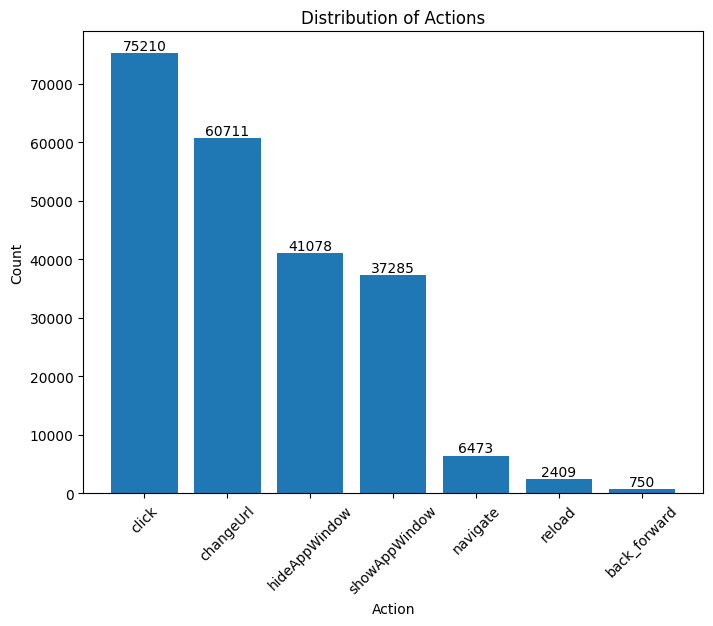

In [ ]:
# Distribution of actions
import matplotlib.pyplot as plt

action_counts = df['action'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(action_counts.index, action_counts.values)
plt.xlabel('Action')
plt.ylabel('Count')
plt.title('Distribution of Actions')
plt.xticks(rotation=45)

# Add values at the top of each bar
for i, count in enumerate(action_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()




---



The code below groups events by the hour of the day and plots a line chart to visualize the hourly distribution of events, helping us to understand any patterns or trends in user activity throughout the day.

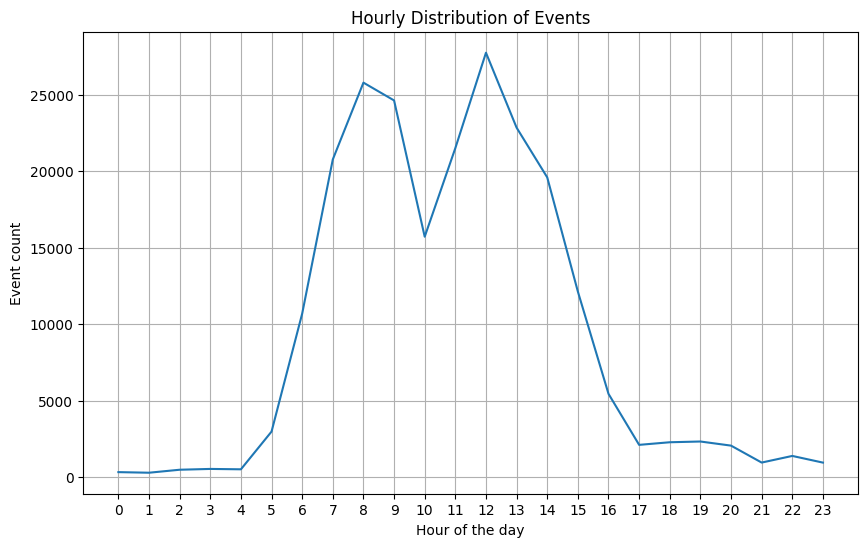

In [ ]:
# Exploring the time-based patterns
df['eventTime'] = pd.to_datetime(df['eventTime'])
df['hour'] = df['eventTime'].dt.hour

hourly_counts = df.groupby('hour').size()
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.xlabel('Hour of the day')
plt.ylabel('Event count')
plt.title('Hourly Distribution of Events')
plt.xticks(range(24))
plt.grid(True)
plt.show()






---



The code below calculates the number of unique sessions per user and creates a histogram to visualize the distribution of user engagement, providing insights into how frequently users engage with the application.

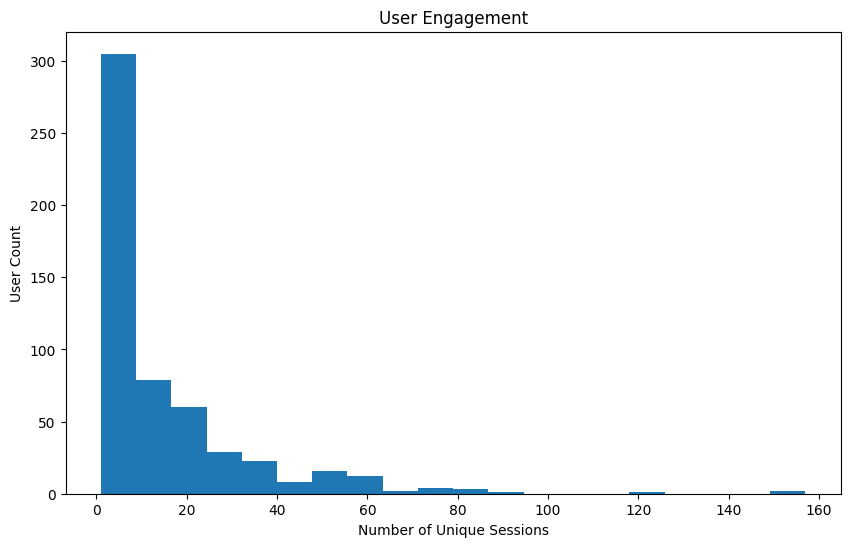

In [ ]:
# Analyzing user engagement
user_engagement = df.groupby('userId')['sessionId'].nunique()
plt.figure(figsize=(10, 6))
plt.hist(user_engagement, bins=20)
plt.xlabel('Number of Unique Sessions')
plt.ylabel('User Count')
plt.title('User Engagement')
plt.show()




---



The code below counts the occurrences of each URL and plots a bar chart to display the top 10 URLs with the highest activity, helping us to identify the most accessed URLs.

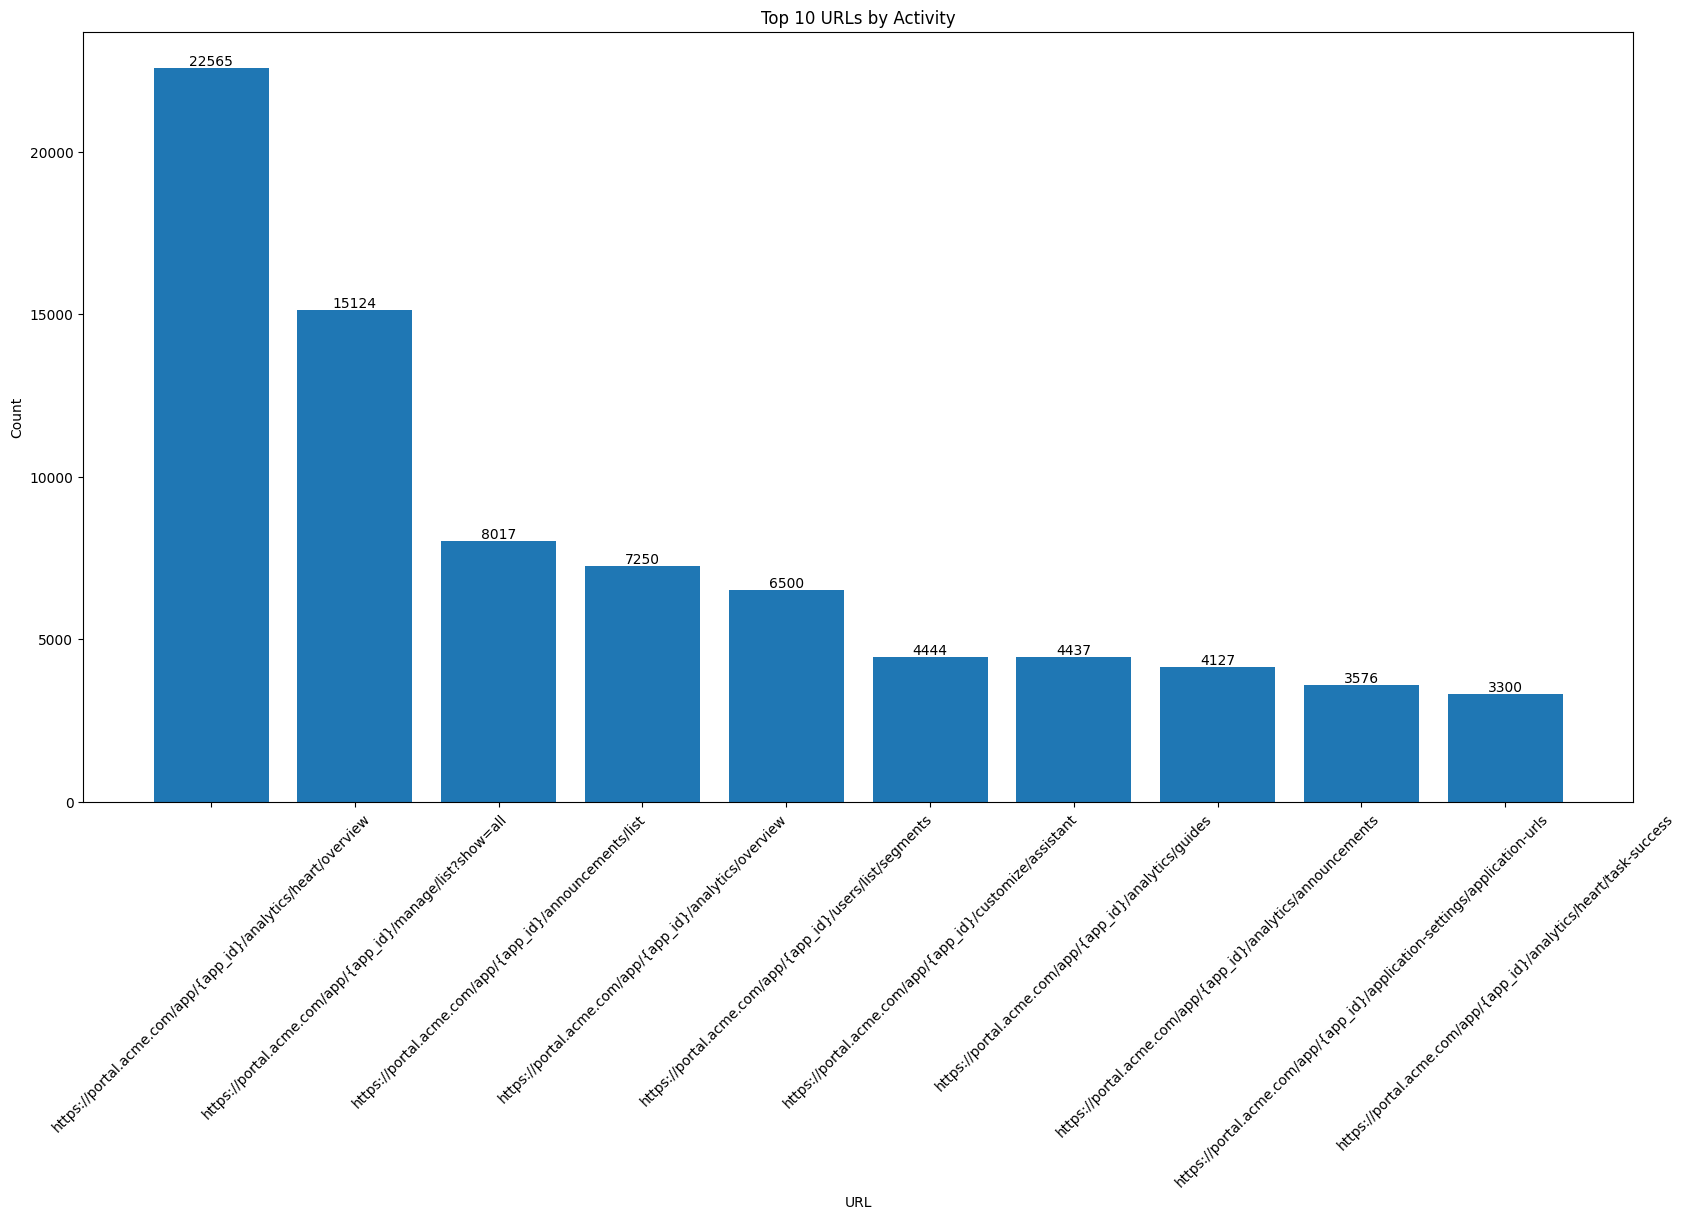

In [ ]:
# Analyzing user activity per URL
url_counts = df['url'].value_counts().nlargest(10)
plt.figure(figsize=(20, 10))
plt.bar(url_counts.index, url_counts.values)
plt.xlabel('URL')
plt.ylabel('Count')
plt.title('Top 10 URLs by Activity')
plt.xticks(rotation=45)

# Add values at the top of each bar
for i, count in enumerate(url_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()




---



The code below creates a heatmap to visualize the user activity patterns over different hours of the day and days of the week. It provides insights into the most active time slots for each day.

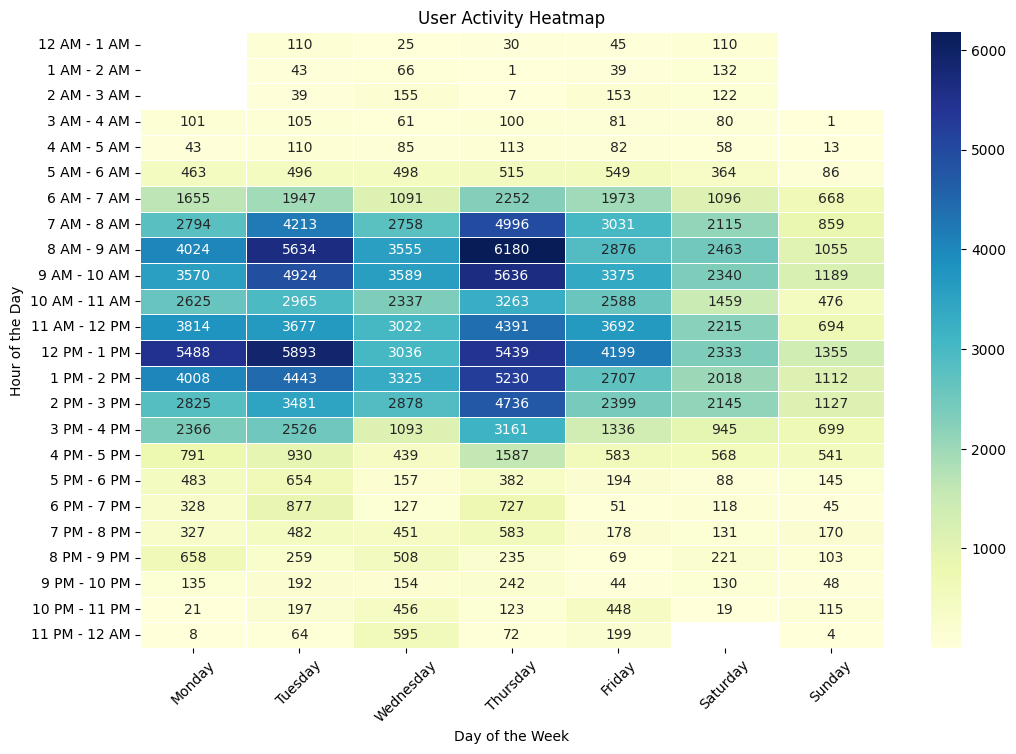

In [ ]:
# Create a pivot table with event counts by hour and day of the week
df['day_of_week'] = df['eventTime'].dt.dayofweek
hourly_activity = df.pivot_table(index='hour', columns='day_of_week', values='eventTime', aggfunc='count')

# Define the day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Define the hour ranges
hour_ranges = ['12 AM - 1 AM', '1 AM - 2 AM', '2 AM - 3 AM', '3 AM - 4 AM', '4 AM - 5 AM', '5 AM - 6 AM',
               '6 AM - 7 AM', '7 AM - 8 AM', '8 AM - 9 AM', '9 AM - 10 AM', '10 AM - 11 AM', '11 AM - 12 PM',
               '12 PM - 1 PM', '1 PM - 2 PM', '2 PM - 3 PM', '3 PM - 4 PM', '4 PM - 5 PM', '5 PM - 6 PM',
               '6 PM - 7 PM', '7 PM - 8 PM', '8 PM - 9 PM', '9 PM - 10 PM', '10 PM - 11 PM', '11 PM - 12 AM']

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_activity, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='g', cbar=True)

# Set x-axis labels with day names
plt.xticks(np.arange(0.5, 7.5), day_names, rotation=45)

# Set y-axis labels with hour ranges
plt.yticks(np.arange(0.5, 24.5), hour_ranges, rotation=0)

plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.title('User Activity Heatmap')
plt.show()


* This is an **important result** where the heatmap allows for the identification of any recurring patterns or trends in user activity over the course of a week.
* From the heatmap, we can identify periods of high activity as clusters of darker colors, indicating peak times when users are most active. Conversely, lighter colors represent periods of low activity or off-peak times.
* For example, it can be seen that 4th (**Thursday**) day of the week is the busiest day whereas the time between **6:00 and 16:00** seems to be the most used hours during the day which can be attributed to general office timings.



---



In [ ]:
# Just check once how our dataframe is looking at this point
df.head(-1)


,userId,eventTime,action,url,sessionId,sessionDuration,hour,day_of_week
43381,1.449040e+19,2023-05-04 11:40:00,click,https://portal.acme.com/app/{app_id}/analytics...,4.975290e+15,NaN,11,3
43384,1.449040e+19,2023-05-04 11:40:00,click,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,0.0,11,3
58470,1.449040e+19,2023-05-04 11:40:00,showAppWindow,https://portal.acme.com/app/{app_id}/analytics...,4.975290e+15,0.0,11,3
58478,1.449040e+19,2023-05-04 11:40:00,changeUrl,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,0.0,11,3
43428,1.449040e+19,2023-05-04 11:41:00,click,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,60.0,11,3
...,...,...,...,...,...,...,...,...
54092,1.119460e+19,2023-04-04 14:24:00,showAppWindow,https://portal.acme.com/app/{app_id}/manage/96...,1.844440e+19,180.0,14,1
351188,4.583000e+18,2023-04-26 07:45:00,navigate,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19,NaN,7,2
351208,4.583000e+18,2023-04-26 07:45:00,click,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19,0.0,7,2
351209,4.583000e+18,2023-04-26 07:45:00,changeUrl,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19,0.0,7,2




---



The code below generates a scatter plot to examine the relationship between the number of events in a session and the duration of the session. It helps us to identify any correlation or patterns between session length and the level of user activity.

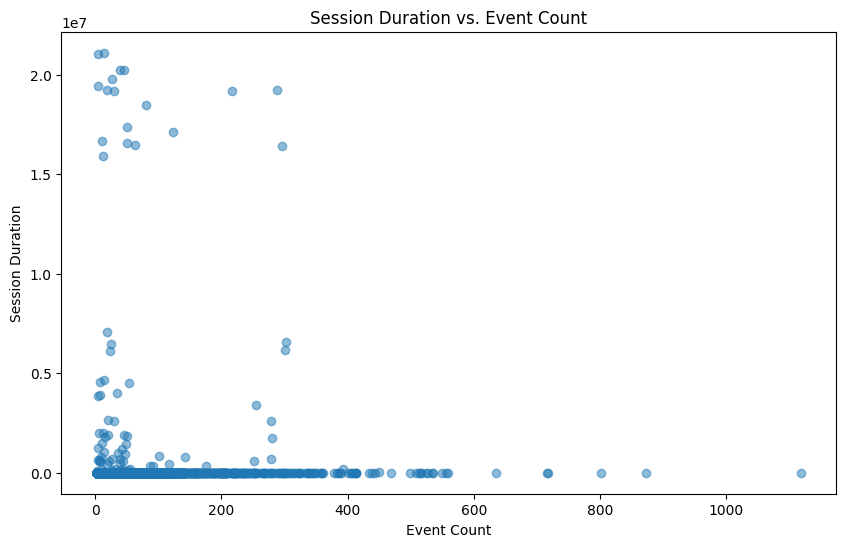

In [ ]:
# Scatter plot to explore the relationship between session duration and event count
session_stats = df.groupby('sessionId').agg({'eventTime': 'count', 'sessionDuration': 'max'})

plt.figure(figsize=(10, 6))
plt.scatter(session_stats['eventTime'], session_stats['sessionDuration'], alpha=0.5)
plt.xlabel('Event Count')
plt.ylabel('Session Duration')
plt.title('Session Duration vs. Event Count')
plt.show()




---



The code below utilizes a violin plot to display the distribution of event counts per user. It provides a visual representation of the data distribution, including information about the quartiles, median, and density estimation.

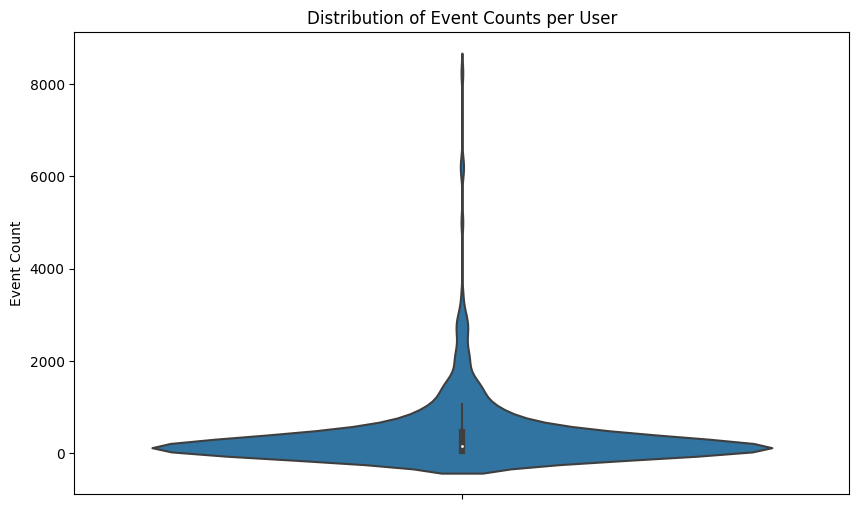

In [ ]:
# Distribution of event counts per user using a violin plot
user_event_counts = df.groupby('userId').size().reset_index(name='eventCount')

plt.figure(figsize=(10, 6))
sns.violinplot(data=user_event_counts, y='eventCount')
plt.ylabel('Event Count')
plt.title('Distribution of Event Counts per User')
plt.show()


* Event Count Distribution: The plot visualizes the distribution of event counts across different users. Each "violin" represents a user, and its shape indicates the density of event counts. The width of the violin corresponds to the number of users with similar event counts.
* Central Tendency: The plot shows the central tendency of event counts per user. The thick horizontal line inside each violin represents the median value. It gives an idea of the typical or average number of events per user.

* Spread and Skewness: The spread and skewness of event counts can be observed from the shape of the violins. Wider violins indicate a larger range of event counts, while narrower violins suggest less variability. If a violin is asymmetrical, it indicates skewness in the distribution of event counts.

* Outliers: The plot may reveal outliers as individual points or small horizontal lines extending from the violins. These points or lines represent users with exceptionally high or low event counts compared to the majority.



---



The code below generates a box plot to compare the distribution of session durations across different actions. The action column is plotted on the x-axis, and the sessionDuration column is plotted on the y-axis. The box plot provides information about the median, quartiles, and potential outliers for each action.

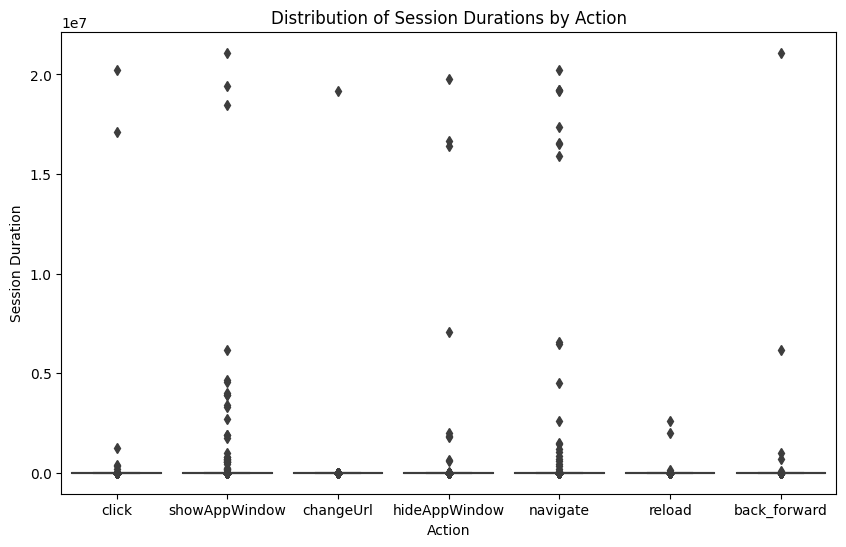

In [ ]:
# Box plot to visualize the distribution of session durations for each action:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='action', y='sessionDuration')
plt.xlabel('Action')
plt.ylabel('Session Duration')
plt.title('Distribution of Session Durations by Action')
plt.show()


* By comparing the boxes and medians across different actions, we can identify differences in session durations between actions. For example, if the box for an action is shifted towards higher session durations compared to other actions, it suggests that users tend to have longer sessions for that particular action.
* Overall, the box plot provides a summary of the distribution of session durations for each action category. It helps identify variations, central tendencies, and potential outliers in session durations, allowing us to compare different actions and gain insights into the typical duration of user sessions for each action.



---



# Clustering

To **visualize the clusters** based on the above data, we first need to perform clustering analysis to assign users into different clusters based on their activity patterns. We visualize the clusters by plotting the transformed features on a scatter plot, where each data point represents a user and is colored according to the assigned cluster. The resulting visualization provides insights into the grouping of users based on their activity patterns.

In [ ]:
df_new = df.copy()
columns_to_drop = ['sessionDuration', 'hour', 'day_of_week']  # Specify the columns to drop
df_new = df_new.drop(columns_to_drop, axis=1)  # Drop the specified columns
df_new
# df

,userId,eventTime,action,url,sessionId
43381,1.449040e+19,2023-05-04 11:40:00,click,https://portal.acme.com/app/{app_id}/analytics...,4.975290e+15
43384,1.449040e+19,2023-05-04 11:40:00,click,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15
58470,1.449040e+19,2023-05-04 11:40:00,showAppWindow,https://portal.acme.com/app/{app_id}/analytics...,4.975290e+15
58478,1.449040e+19,2023-05-04 11:40:00,changeUrl,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15
43428,1.449040e+19,2023-05-04 11:41:00,click,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15
...,...,...,...,...,...
351188,4.583000e+18,2023-04-26 07:45:00,navigate,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19
351208,4.583000e+18,2023-04-26 07:45:00,click,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19
351209,4.583000e+18,2023-04-26 07:45:00,changeUrl,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19
279367,4.583000e+18,2023-04-26 07:46:00,click,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19




---



The below codes are used for feature selction (PCA and SelectKBest from scikitlearn) before visualization of clusters. **However, since data is huge, it's crashing in my notebook** and hence I have commented.

In [ ]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Exclude datetime column from the features
# X = df_new.drop(['action', 'eventTime'], axis=1)

# # Convert categorical columns to numerical representation
# X_encoded = pd.get_dummies(X)

# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_encoded)

# # Apply PCA
# pca = PCA(n_components=5)
# X_pca = pca.fit_transform(X_scaled)

# # Get the selected feature names
# selected_feature_names = X_encoded.columns[pca.components_.argmax(axis=1)]

# # Print the selected feature names
# print("Selected Features:")
# selected_feature_names


In [ ]:
# import pandas as pd
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# # Separate the features and target variable
# X = df_new.drop(['action', 'eventTime'], axis=1)
# y = df_new['action']

# # Convert categorical columns to numerical representation
# X_encoded = pd.get_dummies(X)

# # Apply feature selection using chi-square test
# selector = SelectKBest(score_func=chi2, k=5)
# X_selected = selector.fit_transform(X_encoded, y)

# # Get the selected feature names
# selected_feature_names = X_encoded.columns[selector.get_support()]

# # Print the selected feature names
# print("Selected Features:")
# selected_feature_names




---



In [ ]:
df.head()

,userId,eventTime,action,url,sessionId,sessionDuration,hour,day_of_week
43381,1.449040e+19,2023-05-04 11:40:00,click,https://portal.acme.com/app/{app_id}/analytics...,4.975290e+15,NaN,11,3
43384,1.449040e+19,2023-05-04 11:40:00,click,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,0.0,11,3
58470,1.449040e+19,2023-05-04 11:40:00,showAppWindow,https://portal.acme.com/app/{app_id}/analytics...,4.975290e+15,0.0,11,3
58478,1.449040e+19,2023-05-04 11:40:00,changeUrl,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,0.0,11,3
43428,1.449040e+19,2023-05-04 11:41:00,click,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,60.0,11,3


To create user segments or clusters based on user activity, we can use unsupervised machine learning algorithms such as **K-means clustering**. I assume that the *hour_of_day* and *event_count* features are relevant for clustering the users based on their activity. The data is preprocessed to extract these features, and then the features are scaled using StandardScaler to ensure they have comparable scales. K-means clustering is then applied to identify three clusters (n_clusters=3), but this parameter can be adjusted based on our specific needs.

The resulting cluster labels are assigned to each user, and the distribution of users can be explored across the clusters using the cluster_counts variable. Additionally, a scatter plot is created to visualize the clusters, with the x-axis representing the hour of the day and the y-axis representing the event count.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Counts:
1    111381
0     86900
2     25635
Name: cluster, dtype: int64

Cluster 0 sample data:
             userId           eventTime         action  \
44157  1.449040e+19 2023-05-04 12:01:00       navigate   
44159  1.449040e+19 2023-05-04 12:01:00  showAppWindow   
44165  1.449040e+19 2023-05-04 12:01:00          click   
44175  1.449040e+19 2023-05-04 12:01:00  hideAppWindow   
58863  1.449040e+19 2023-05-04 12:01:00  hideAppWindow   

                                                     url     sessionId  \
44157  https://portal.acme.com/app/{app_id}/analytics...  4.975290e+15   
44159  https://portal.acme.com/app/{app_id}/analytics...  4.975290e+15   
44165  https://portal.acme.com/app/{app_id}/analytics...  4.975290e+15   
44175  https://portal.acme.com/app/{app_id}/analytics...  4.975290e+15   
58863  https://portal.acme.com/app/{app_id}/analytics...  4.975290e+15   

       sessionDuration  hour  day_of_week  hour_of_day  event_count  cluster  
44157            480.0 

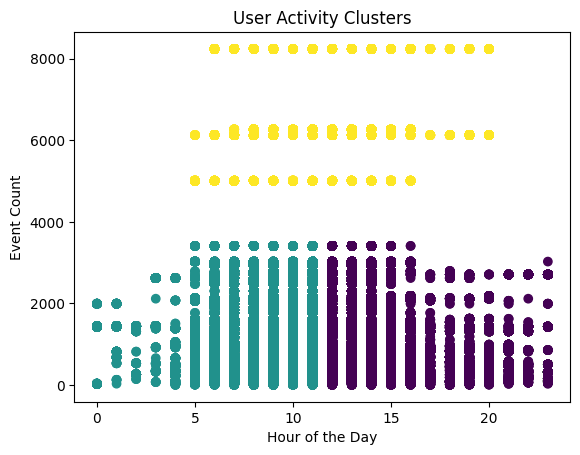

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df['hour_of_day'] = df['eventTime'].dt.hour
df['event_count'] = df.groupby('userId')['action'].transform('count')

# Select relevant features for clustering
features = ['hour_of_day', 'event_count']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the users
df['cluster'] = kmeans.labels_

# Explore the clusters
cluster_counts = df['cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Display sample data points from each cluster
for cluster in range(3):
    print(f"\nCluster {cluster} sample data:")
    print(df[df['cluster'] == cluster].head())

# Plot the clusters
plt.scatter(X['hour_of_day'], X['event_count'], c=df['cluster'], cmap='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Event Count')
plt.title('User Activity Clusters')
plt.show()


1. **Cluster Counts:**

  * This part of the output shows the number of data points assigned to each cluster. It provides information about the size of each cluster. For example, one of the output at the top shows "Cluster 1: 111381", it means that there are 111381 data points assigned to Cluster 1.

2. **Cluster [cluster number] sample data**:

  * This part of the output displays a few sample data points from each cluster. It helps us understand the characteristics of the users within each cluster. It shows the user ID, event time, action, URL, session ID, session duration, hour of the day, day of the week, and the cluster label assigned to each data point.

3. **Scatter Plot:**

  * The scatter plot visualizes the clusters created by *K-means clustering*. The x-axis represents the hour of the day, and the y-axis represents the event count for each user. Each data point in the plot corresponds to a user, and its color represents the assigned cluster label.

  * By examining the scatter plot, we can gain insights into the distribution of user activity based on the hour of the day and the number of events.

  * Clusters with different colors indicate different patterns or groups of users with distinct activity levels or behaviors.

  * The scatter plot helps visualize how users are grouped into clusters based on their activity patterns.

Overall, the output provides information about the distribution of data points across clusters, sample data points from each cluster, and a visual representation of the clusters through the scatter plot. These insights can help understand user behavior patterns and identify groups of users with similar activity characteristics.

# Extras: Some More Analysis

Based on the provided data, here are some potential features that can be considered:

In [ ]:
# Total number of events for each user
user_event_count = df.groupby('userId')['eventTime'].count().reset_index(name='totalEventCount')
user_event_count

,userId,totalEventCount
0,1.196160e+16,13
1,1.281330e+16,512
2,1.348340e+16,46
3,4.292210e+16,27
4,2.938220e+17,2
...,...,...
540,1.836260e+19,58
541,1.839930e+19,1379
542,1.840710e+19,54
543,1.841150e+19,92


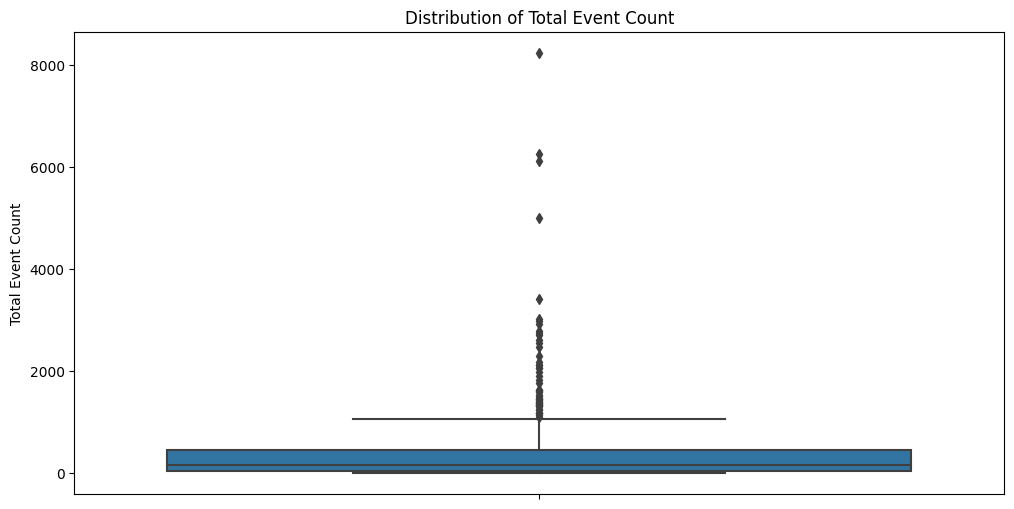

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=user_event_count, y='totalEventCount')
plt.ylabel('Total Event Count')
plt.title('Distribution of Total Event Count')
plt.show()


* The box plot above represents the interquartile range (IQR), which contains the middle 50% of the data. The bottom edge of the box represents the 25th percentile (Q1) which as expected starts at 0 and the top edge represents the 75th percentile (Q3) which lies somwhere at 1000. The height of the box indicates the spread of the data within this range which seems to be 1000. Inside the box, there is a horizontal line that represents the median (Q2), which is the middle value of the dataset which seems to be somwhere around 500.
* So, the total event counts lie in the range 0-1000.



---



In [ ]:
# Number of unique days on which each user had activity
user_active_days = df.groupby('userId')['eventTime'].apply(lambda x: x.dt.date.nunique()).reset_index(name='activeDays')
user_active_days

,userId,activeDays
0,1.196160e+16,1
1,1.281330e+16,7
2,1.348340e+16,1
3,4.292210e+16,1
4,2.938220e+17,2
...,...,...
540,1.836260e+19,2
541,1.839930e+19,17
542,1.840710e+19,2
543,1.841150e+19,3


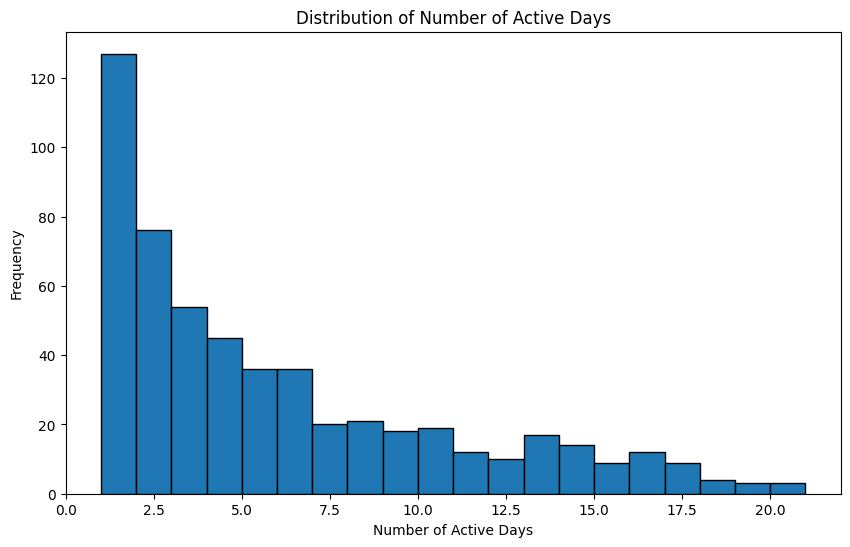

In [ ]:
import matplotlib.pyplot as plt

user_active_days = df.groupby('userId')['eventTime'].apply(lambda x: x.dt.date.nunique()).reset_index(name='activeDays')

plt.figure(figsize=(10, 6))
plt.hist(user_active_days['activeDays'], bins=20, edgecolor='black')
plt.xlabel('Number of Active Days')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Active Days')
plt.show()


* The above plot shows that most users fall in the 1 to 7 days i.e. they are active for 1-7days with 1 day having the highest frequency among all.



---



In [ ]:
# Average number of events per day for each user
user_avg_events_per_day = df.groupby(['userId', df['eventTime'].dt.date])['eventTime'].count().reset_index(name='eventsPerDay')
user_avg_events_per_day = user_avg_events_per_day.groupby('userId')['eventsPerDay'].mean().reset_index(name='avgEventsPerDay')
user_avg_events_per_day

,userId,avgEventsPerDay
0,1.196160e+16,13.000000
1,1.281330e+16,73.142857
2,1.348340e+16,46.000000
3,4.292210e+16,27.000000
4,2.938220e+17,1.000000
...,...,...
540,1.836260e+19,29.000000
541,1.839930e+19,81.117647
542,1.840710e+19,27.000000
543,1.841150e+19,30.666667




---



In [ ]:
# Maximum session duration for each user
user_max_session_duration = df.groupby('userId')['sessionDuration'].max().reset_index(name='maxSessionDuration')
user_max_session_duration

,userId,maxSessionDuration
0,1.196160e+16,840.0
1,1.281330e+16,1620.0
2,1.348340e+16,420.0
3,4.292210e+16,1260.0
4,2.938220e+17,NaN
...,...,...
540,1.836260e+19,420.0
541,1.839930e+19,163860.0
542,1.840710e+19,4650300.0
543,1.841150e+19,1560.0




---



In [ ]:
# Distribution of different actions for each user; separate features for each action
user_actions = pd.pivot_table(df, index='userId', columns='action', aggfunc='size', fill_value=0)
user_actions = user_actions.add_prefix('action_').reset_index()
user_actions

action,userId,action_back_forward,action_changeUrl,action_click,action_hideAppWindow,action_navigate,action_reload,action_showAppWindow
0,1.196160e+16,0,0,0,7,1,0,5
1,1.281330e+16,5,167,197,69,12,2,60
2,1.348340e+16,0,18,18,4,2,0,4
3,4.292210e+16,0,3,10,7,1,0,6
4,2.938220e+17,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...
540,1.836260e+19,1,14,17,13,2,0,11
541,1.839930e+19,1,410,438,251,60,13,206
542,1.840710e+19,0,8,8,19,2,0,17
543,1.841150e+19,0,25,27,16,4,0,20




---



In [ ]:
# Distribution of user activity across different hours of the day; separate features for each hour
user_hourly_activity = pd.pivot_table(df, index='userId', columns='hour_of_day', aggfunc='size', fill_value=0)
user_hourly_activity = user_hourly_activity.add_prefix('hour_').reset_index()
user_hourly_activity

hour_of_day,userId,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1.196160e+16,0,0,0,0,0,0,2,11,0,...,0,0,0,0,0,0,0,0,0,0
1,1.281330e+16,0,0,0,0,0,0,0,2,2,...,121,119,0,0,0,0,0,0,0,0
2,1.348340e+16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.292210e+16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.938220e+17,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.836260e+19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541,1.839930e+19,0,0,0,0,0,0,0,98,145,...,106,22,9,0,0,0,0,0,0,0
542,1.840710e+19,0,0,0,0,0,0,0,0,0,...,13,4,2,0,0,0,0,0,0,0
543,1.841150e+19,0,0,0,0,0,0,0,0,0,...,0,38,0,0,0,0,0,0,0,0




---



In [ ]:
# Analyze the URL structure in above data
import re

# Extract relevant information from the URL
df['url_structure'] = df['url'].apply(lambda x: re.findall(r'(?<=://)[^/]+', x)[0])

# Count the occurrences of each URL structure
url_counts = df['url_structure'].value_counts()

# Display the URL structure counts
print("URL Structure Counts:")
url_counts


URL Structure Counts:


portal.acme.com                 219770
family-navigation.usln.rocks      2001
family-reviews.usln.rocks         1261
family.usln.rocks                  884
Name: url_structure, dtype: int64



---



In [ ]:
# Patterns in sessions/paths in above data
import re

# Extract session or path information from the URL
df['session_path'] = df['url'].apply(lambda x: re.findall(r'(?<=\.com)(/[^?]+)', x)[0] if re.findall(r'(?<=\.com)(/[^?]+)', x) else 'N/A')

# Count the occurrences of each session or path
session_path_counts = df['session_path'].value_counts()

# Display the session or path counts
print("Session/Path Counts:")
session_path_counts


Session/Path Counts:


/app/{app_id}/manage/list                      42471
/app/{app_id}/analytics/heart/overview         22660
/app/{app_id}/announcements/list                8017
/app/{app_id}/analytics/overview                7250
/app/{app_id}/users/list/segments/builder       6682
                                               ...  
/app/{app_id}/users/detail/84202344/details        1
/app/{app_id}/users/detail/84145684/details        1
/app/{app_id}/users/detail/83902705/details        1
/app/{app_id}/manage/80303/edit/steps              1
/app/{app_id}/manage/83588/edit/steps              1
Name: session_path, Length: 3918, dtype: int64



---



# Predictive Modeling

* There are some redudant columns that I have added for visualization process and thus needs to be removed in order to make good predictive model.
* Also, the column 'eventTime' is extracted into separate features as day_of_week and hour_of_day as the column cannot be used in modeling due to its data type which is not possible to convert to int values.
* The column 'url' doesnt contain values like date-time and can be converted to int values.
* Logically, I found **'action'** column more like a target (label) column and it has been selected as the dependent variable (y) for the below classification models.

In [ ]:
# How the dataframe at this point is looking
df

,userId,eventTime,action,url,sessionId,sessionDuration,hour,day_of_week,hour_of_day,event_count,cluster,url_structure,session_path
43381,1.449040e+19,2023-05-04 11:40:00,click,https://portal.acme.com/app/{app_id}/analytics...,4.975290e+15,NaN,11,3,11,691,1,portal.acme.com,/app/{app_id}/analytics/heart/overview
43384,1.449040e+19,2023-05-04 11:40:00,click,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,0.0,11,3,11,691,1,portal.acme.com,/app/{app_id}/manage/list
58470,1.449040e+19,2023-05-04 11:40:00,showAppWindow,https://portal.acme.com/app/{app_id}/analytics...,4.975290e+15,0.0,11,3,11,691,1,portal.acme.com,/app/{app_id}/analytics/heart/overview
58478,1.449040e+19,2023-05-04 11:40:00,changeUrl,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,0.0,11,3,11,691,1,portal.acme.com,/app/{app_id}/manage/list
43428,1.449040e+19,2023-05-04 11:41:00,click,https://portal.acme.com/app/{app_id}/manage/li...,4.975290e+15,60.0,11,3,11,691,1,portal.acme.com,/app/{app_id}/manage/list
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351188,4.583000e+18,2023-04-26 07:45:00,navigate,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19,NaN,7,2,7,764,1,portal.acme.com,/app/{app_id}/analytics/heart/overview
351208,4.583000e+18,2023-04-26 07:45:00,click,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19,0.0,7,2,7,764,1,portal.acme.com,/app/{app_id}/analytics/heart/overview
351209,4.583000e+18,2023-04-26 07:45:00,changeUrl,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19,0.0,7,2,7,764,1,portal.acme.com,/app/{app_id}/analytics/heart/task-success
279367,4.583000e+18,2023-04-26 07:46:00,click,https://portal.acme.com/app/{app_id}/analytics...,1.844530e+19,60.0,7,2,7,764,1,portal.acme.com,/app/{app_id}/analytics/heart/task-success


In [ ]:
df_copy = df.copy()
columns_to_drop = ['eventTime', 'sessionId', 'sessionDuration', 'hour', 'event_count', 'cluster', 'url_structure', 'session_path']  # Specify the columns to drop
df_copy = df_copy.drop(columns_to_drop, axis=1)  # Drop the specified columns

column_to_move = df_copy['action']

# Drop the column from its original position
df_copy = df_copy.drop('action', axis=1)
df_copy['action'] = column_to_move
df_copy

,userId,url,day_of_week,hour_of_day,action
43381,1.449040e+19,https://portal.acme.com/app/{app_id}/analytics...,3,11,click
43384,1.449040e+19,https://portal.acme.com/app/{app_id}/manage/li...,3,11,click
58470,1.449040e+19,https://portal.acme.com/app/{app_id}/analytics...,3,11,showAppWindow
58478,1.449040e+19,https://portal.acme.com/app/{app_id}/manage/li...,3,11,changeUrl
43428,1.449040e+19,https://portal.acme.com/app/{app_id}/manage/li...,3,11,click
...,...,...,...,...,...
351188,4.583000e+18,https://portal.acme.com/app/{app_id}/analytics...,2,7,navigate
351208,4.583000e+18,https://portal.acme.com/app/{app_id}/analytics...,2,7,click
351209,4.583000e+18,https://portal.acme.com/app/{app_id}/analytics...,2,7,changeUrl
279367,4.583000e+18,https://portal.acme.com/app/{app_id}/analytics...,2,7,click


### Scikit-Learn classifiers

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# Split the data into features (X) and target variable (y)
X = df_copy.drop('action', axis=1)
y = df_copy['action']

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train different classifiers
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
]

for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier
    print(f"Classifier: {classifier.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------------")


Classifier: DecisionTreeClassifier
               precision    recall  f1-score   support

 back_forward       0.06      0.06      0.06       143
    changeUrl       0.17      0.20      0.18     12160
        click       0.19      0.21      0.20     14957
hideAppWindow       0.22      0.23      0.22      8210
     navigate       0.06      0.02      0.03      1285
       reload       0.64      0.30      0.40       505
showAppWindow       0.14      0.08      0.10      7524

     accuracy                           0.18     44784
    macro avg       0.21      0.16      0.17     44784
 weighted avg       0.18      0.18      0.18     44784

--------------------------------------------------
Classifier: RandomForestClassifier
               precision    recall  f1-score   support

 back_forward       0.05      0.02      0.03       143
    changeUrl       0.15      0.13      0.14     12160
        click       0.23      0.28      0.25     14957
hideAppWindow       0.19      0.20      0.20      

Explanation of the above results:

* Precision: It measures the ability of the model to correctly predict each class (action) among the predicted instances. A higher precision indicates fewer false positives. For example, the precision for the "changeUrl" class is 0.17, which means that 17% of the instances predicted as "changeUrl" were actually "changeUrl".

* Recall: It measures the ability of the model to correctly identify each class (action) among the actual instances. A higher recall indicates fewer false negatives. For example, the recall for the "click" class is 0.21, which means that 21% of the actual "click" instances were correctly identified as "click".

* F1-score: It is the harmonic mean of precision and recall and provides a balanced measure of model performance. It considers both precision and recall. For example, the f1-score for the "reload" class is 0.40, which indicates a relatively balanced performance in predicting the "reload" class.

* Support: It represents the number of instances in each class. It shows how many instances of each class were present in the testing set. For example, there were 143 instances of the "back_forward" class, 12160 instances of the "changeUrl" class, and so on.

* Accuracy: It measures the overall accuracy of the model in predicting all classes. It is the ratio of correctly predicted instances to the total number of instances. In this case, the accuracy of the DecisionTreeClassifier model is 0.18 or 18%, indicating that the model correctly predicted the action for 18% of the instances.

* Macro avg: It is the average of precision, recall, and f1-score across all classes. It provides an overall measure of model performance without considering class imbalance.

* Weighted avg: It is the weighted average of precision, recall, and f1-score, weighted by the number of instances in each class. It accounts for class imbalance and provides an overall measure of model performance.

Overall, the DecisionTreeClassifier model exhibits inconsistent performance across different classes, displaying relatively low precision, recall, and f1-score for the majority of classes. Moreover, the model's accuracy is relatively low. These findings imply that the model might struggle to accurately capture the underlying patterns within the data or that the data itself possesses inherent complexities, posing challenges for accurate action prediction. To enhance the predictive performance, additional analysis, feature engineering, or experimentation with alternative models may be required.









---



### Neural Network (PyTorch)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, Dataset

# Load the data
data = df_copy.copy()

# Preprocess the data
le = LabelEncoder()
data['action'] = le.fit_transform(data['action'])  # Encode the target variable

# Convert non-numeric columns to numeric
non_numeric_cols = ['url']
for col in non_numeric_cols:
    data[col] = le.fit_transform(data[col])

# Split the data into features and target
features = data.drop('action', axis=1)
target = data['action']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, features, target):
        self.features = features
        self.target = target

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        x = torch.Tensor(self.features.iloc[index].values)
        y = torch.Tensor([self.target.iloc[index]])
        return x, y

# Create DataLoader for training and testing sets
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define the model architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(len(features.columns), 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, len(le.classes_))
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.softmax(x)
        return x

# Instantiate the model
model = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 1
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels.long().squeeze())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.long().squeeze()).sum().item()

    accuracy = correct / total
    print(f"Epoch {epoch+1} - Loss: {running_loss/len(train_loader)}")


# Evaluate the model
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.long().squeeze()).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy}")


Epoch 1 - Loss: 9.502764701672902
Test Accuracy: 0.0


* The above result is for a basic PyTorch model run for a epoch. As we know, more complex models can be used to get better results. The scope of Neural networks is always big and many other architectures like ResNet, AlexNet, etc. can be used as backbone along with other famous neck architectures like FPNs (Feature Pyramid Network).






---



# **Thank You!**